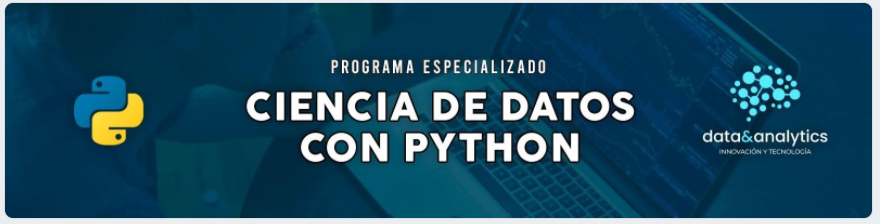

#DATA & ANALYTICS

----------------------------
INTRODUCCION A LA INFERENCIA ESTADISTICA

Aplicar Estadística Inferencial - Trabajar hasta con 5
variables (seleccionar las variables a preferencia).

In [1]:
#cargamos las librerias
import pandas as pd
import seaborn as sns # visualización
import statistics as stats # estadística
import random
import matplotlib.pyplot as plt

random.seed(123)

## 1. Importamos los datos

In [2]:
#cargamos la data desde nuestra PC
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
#levantamos la data con pandas
data_salud = pd.read_excel('/content/drive/MyDrive/Data - DATA & ANALYTICS/Data_Nutricion_grupos.xlsx')  #Data - Riesgos.csv
data_salud.head()

,Individuo,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Grupos
0,Persona 1,155.7,16.0,71.2,35.7,29.576170,90.0,98.0,0.918367,0.578035,36.446202,45.250304,13.0,27.0,32.0,34.0,A
1,Persona 2,166.5,16.0,61.0,31.8,22.364707,80.9,100.5,0.804975,0.485886,28.790714,43.437664,5.0,19.0,15.0,22.0,A
2,Persona 3,151.3,16.0,49.1,30.5,21.623567,72.0,86.0,0.837209,0.475876,29.867419,34.435097,13.0,18.0,18.0,17.0,A
3,Persona 4,151.7,16.0,54.6,32.6,23.117479,NaN,88.4,0.841629,0.490442,27.867640,39.384269,5.0,19.0,15.0,18.0,A
4,Persona 5,160.3,16.0,58.0,30.1,22.260196,NaN,97.9,0.813075,NaN,30.276688,40.439521,10.0,19.0,20.0,19.0,A


In [4]:
data_salud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Individuo                    652 non-null    object 
 1   talla                        624 non-null    float64
 2   edad                         645 non-null    float64
 3   peso_kg                      629 non-null    float64
 4   circun_cuello                623 non-null    float64
 5   IMC                          640 non-null    float64
 6   circun_cintura               637 non-null    float64
 7   cadera                       647 non-null    float64
 8   ind_cintura_cadera           639 non-null    float64
 9   ind_cintura_estatura         636 non-null    float64
 10  por_grasa_corporal           650 non-null    float64
 11  masa_corporal_magra_kg       648 non-null    float64
 12  pliegue_cutaneo_BICEPS       652 non-null    float64
 13  pliegue_cutaneo_TRIC

### Separamos la data en 2 partes para imputar

In [10]:
# Data numérica
data_salud_num = data_salud.loc[:, ['talla', 'edad', 'peso_kg', 'IMC', 'cadera']] 
data_salud_num.head(10)

,talla,edad,peso_kg,IMC,cadera
0,155.7,16.0,71.2,29.576170,98.0
1,166.5,16.0,61.0,22.364707,100.5
2,151.3,16.0,49.1,21.623567,86.0
3,151.7,16.0,54.6,23.117479,88.4
4,160.3,16.0,58.0,22.260196,97.9
5,162.4,16.0,70.8,26.124451,106.1
6,167.0,16.0,47.4,17.318656,81.5
7,158.7,16.0,49.3,18.979031,83.2
8,158.2,16.0,91.0,35.521296,116.0
9,171.0,16.0,50.4,17.543860,80.0


In [11]:
# Data categórica 
data_salud_cat = data_salud.loc[:, ['Individuo', 'Grupos']] 
data_salud_cat.head(6)

,Individuo,Grupos
0,Persona 1,A
1,Persona 2,A
2,Persona 3,A
3,Persona 4,A
4,Persona 5,A
5,Persona 6,A


## 2. Información de datos perdidos

In [12]:
# Observamos los datos perdidos
data_salud_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   talla    624 non-null    float64
 1   edad     645 non-null    float64
 2   peso_kg  629 non-null    float64
 3   IMC      640 non-null    float64
 4   cadera   647 non-null    float64
dtypes: float64(5)
memory usage: 25.6 KB


In [13]:
# Convertimos en tipo "str"
# Observamos los datos perdidos

data_salud_cat = data_salud_cat.apply(lambda x: x.astype('str'), axis = 0)

data_salud_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Individuo  652 non-null    object
 1   Grupos     652 non-null    object
dtypes: object(2)
memory usage: 10.3+ KB


Verificamos que no todas las variables son numéricas, tenemos también variables categóricas

## 3. Imputación paramétrica

In [14]:
# Reemplazando con la median de cada columna: Variables Cuantitativas

data_salud_num2 = data_salud_num.apply(lambda x: x.fillna(x.median()), axis = 0)

cols_num = data_salud_num2.columns

data_salud_num2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   talla    652 non-null    float64
 1   edad     652 non-null    float64
 2   peso_kg  652 non-null    float64
 3   IMC      652 non-null    float64
 4   cadera   652 non-null    float64
dtypes: float64(5)
memory usage: 25.6 KB


In [15]:
# Reemplazando con la moda de cada columna: Variables Cualitativas

from sklearn.impute import SimpleImputer

simple = SimpleImputer(strategy='most_frequent') # Moda
data_salud_cat2 = simple.fit_transform(data_salud_cat)

data_salud_cat2

array([['Persona 1', 'A'],
       ['Persona 2', 'A'],
       ['Persona 3', 'A'],
       ...,
       ['Persona 650', 'B'],
       ['Persona 651', 'B'],
       ['Persona 652', 'B']], dtype=object)

In [18]:
# Convertimos en DataFrame la matriz

data_salud_cat2 = pd.DataFrame(
    data=data_salud_cat2,
    columns=['Individuo', 'Grupos'])

cols_cual = data_salud_cat2.columns 

data_salud_cat2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Individuo  652 non-null    object
 1   Grupos     652 non-null    object
dtypes: object(2)
memory usage: 10.3+ KB


In [19]:
# Renombramos las columnas cualitativas
import numpy as np

data_salud_cat2['Grupos'] = data_salud_cat2['Grupos'].replace(['A', 'B'],
                         ['Grupo A', 'Grupo B'])

data_salud_cat2.sample(10)

,Individuo,Grupos
115,Persona 116,Grupo A
70,Persona 71,Grupo A
33,Persona 34,Grupo A
540,Persona 541,Grupo B
585,Persona 586,Grupo B
516,Persona 517,Grupo B
356,Persona 357,Grupo B
470,Persona 471,Grupo B
145,Persona 146,Grupo A
363,Persona 364,Grupo B


In [20]:
# Unimos los DataFrame imputados

data_salud_f = pd.merge(data_salud_cat2, data_salud_num2, left_index=True, right_index=True)

data_salud_f.to_csv("data_salud.csv")
data_salud_f.sample(10)

,Individuo,Grupos,talla,edad,peso_kg,IMC,cadera
239,Persona 240,Grupo A,169.5,15.0,54.6,18.656294,83.0
513,Persona 514,Grupo B,152.6,13.0,64.1,26.753400,92.5
227,Persona 228,Grupo A,166.5,15.0,53.6,19.478938,84.0
87,Persona 88,Grupo A,170.5,16.0,41.4,20.117486,84.0
633,Persona 634,Grupo B,172.6,15.0,78.5,26.451155,96.8
545,Persona 546,Grupo B,156.1,14.0,64.1,26.428959,96.0
451,Persona 452,Grupo B,157.6,15.0,63.1,25.686696,92.0
397,Persona 398,Grupo B,156.6,14.0,49.3,20.184671,85.5
253,Persona 254,Grupo A,160.7,15.0,76.5,30.010273,109.8
357,Persona 358,Grupo B,167.2,15.0,63.2,22.320918,83.0


## Visualización

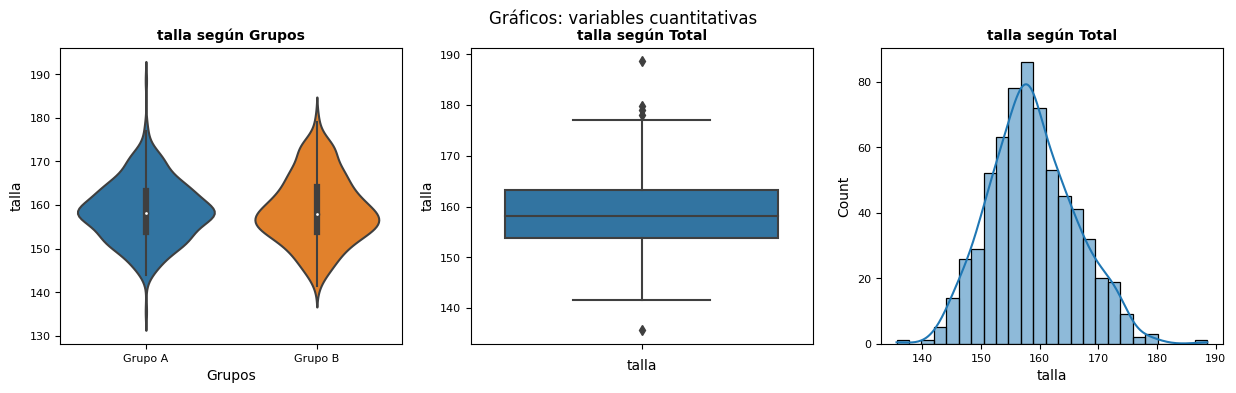

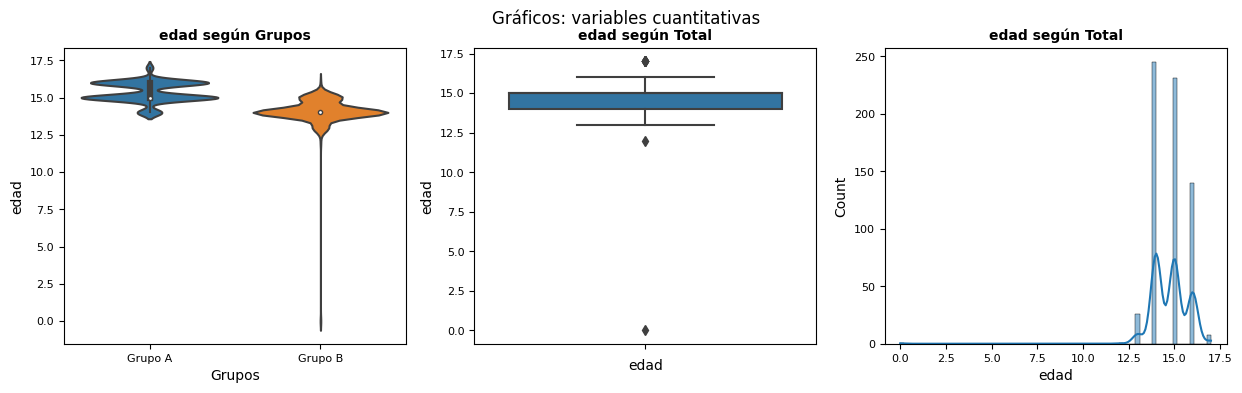

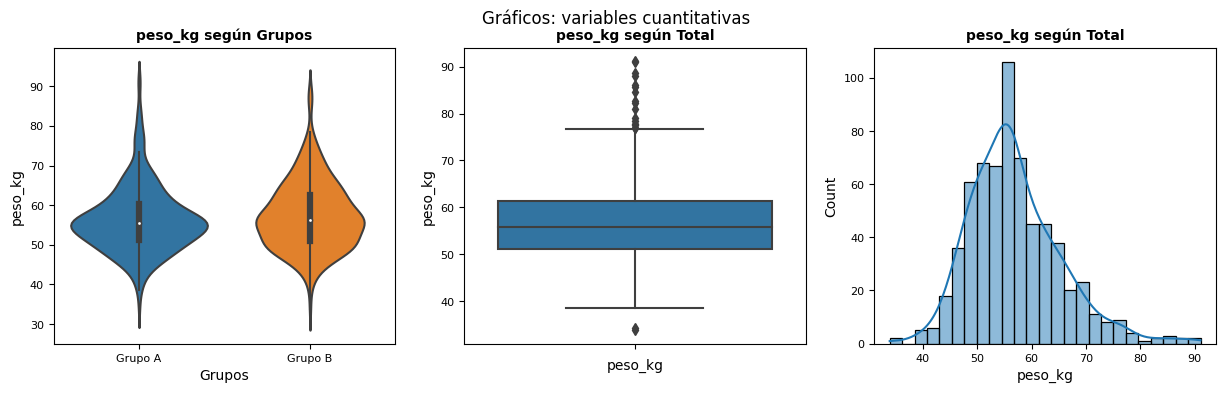

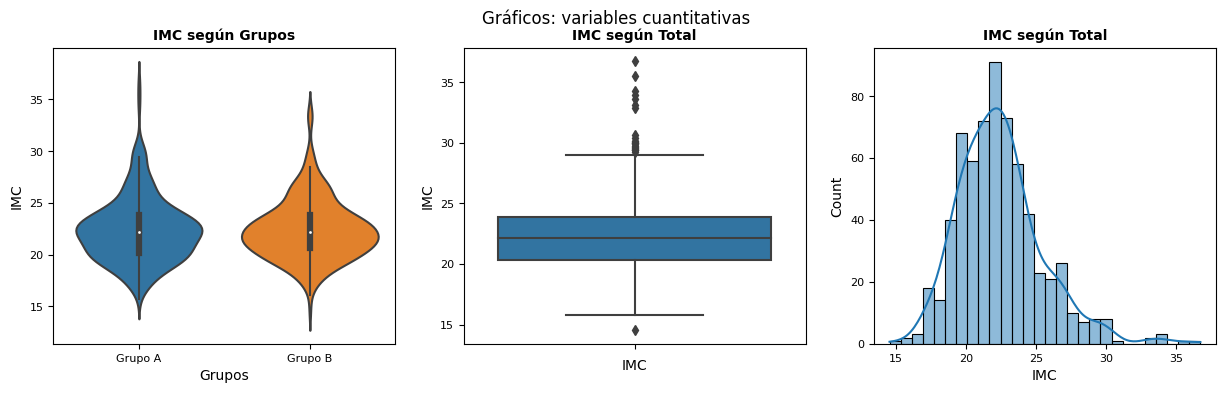

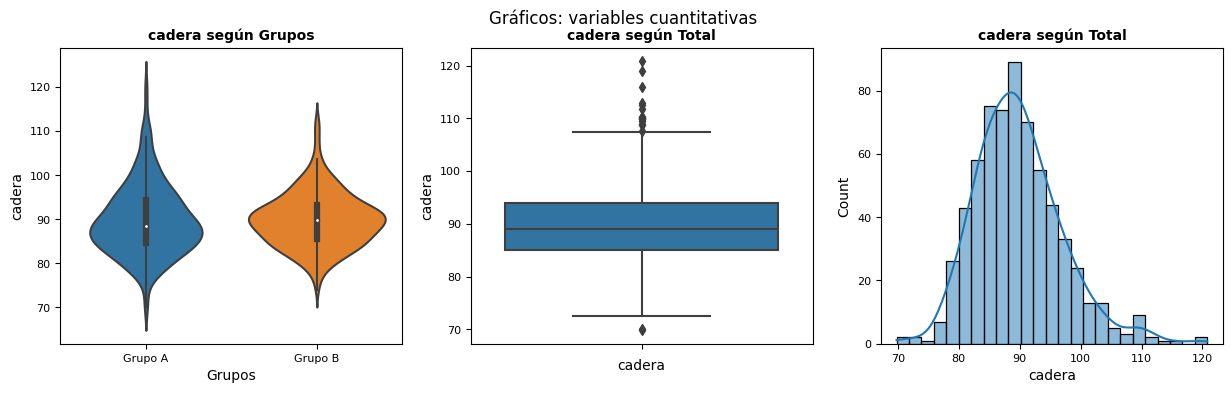

In [21]:
# Graficando las variables cuantitativas

for i, colum in enumerate(cols_num): 
    fig, ax = plt.subplots(1, 3, figsize=(15, 3.84))
    fig.suptitle('Gráficos: variables cuantitativas')
    
    sns.violinplot(x = 'Grupos', y = colum,  data  = data_salud_f, ax=ax[0])
    ax[0].set_title(str(colum) + " según Grupos", fontsize = 10, fontweight = "bold")
    ax[0].tick_params(labelsize = 8)
    ax[0].set_xlabel('Grupos')

    sns.boxplot(y = colum,  data  = data_salud_f, ax=ax[1])
    ax[1].set_title(str(colum) + " según Total", fontsize = 10, fontweight = "bold")
    ax[1].tick_params(labelsize = 8)
    ax[1].set_xlabel(colum)

    sns.histplot(x=colum, data=data_salud_f, kde= True, ax=ax[2])
    ax[2].set_title(str(colum) + " según Total", fontsize = 10, fontweight = "bold")
    ax[2].tick_params(labelsize = 8)
    ax[2].set_xlabel(colum)

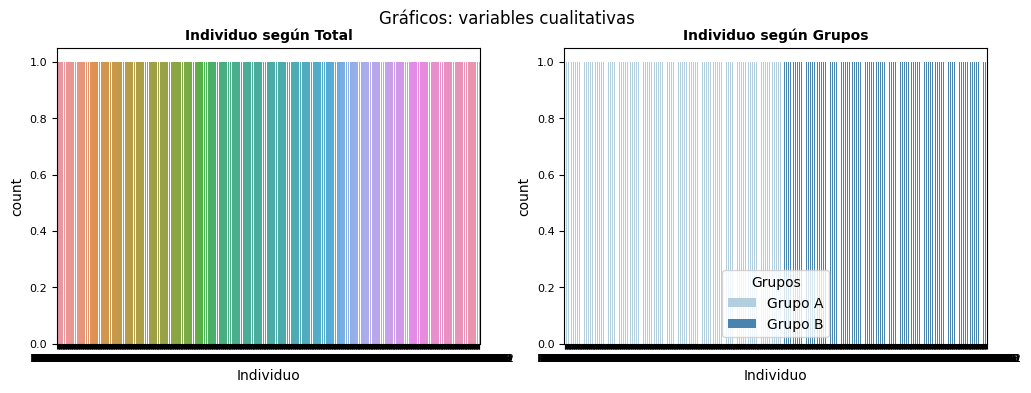

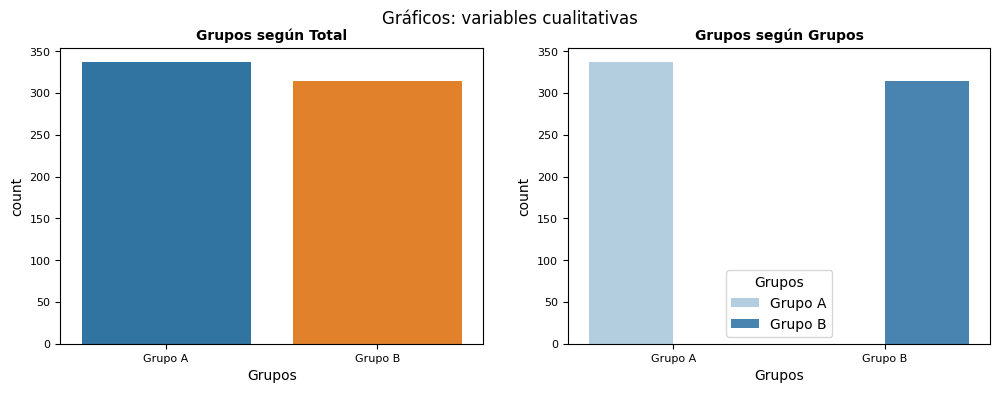

In [23]:
# Graficando las variables cualitativas

for i, colum in enumerate(cols_cual): 
    fig, ax = plt.subplots(1, 2, figsize=(12, 3.84))
    fig.suptitle('Gráficos: variables cualitativas')

    sns.countplot(x=colum, data=data_salud_f, ax=ax[0])
    ax[0].set_title(str(colum) + " según Total", fontsize = 10, fontweight = "bold")
    ax[0].tick_params(labelsize = 8)
    ax[0].set_xlabel(colum)

    sns.countplot(x=colum, hue="Grupos", data=data_salud_f, palette="Blues", ax=ax[1])
    ax[1].set_title(str(colum) + " según Grupos", fontsize = 10, fontweight = "bold")
    ax[1].tick_params(labelsize = 8)
    ax[1].set_xlabel(colum)


## Análisis descriptivo

In [24]:
#data_riesgo_f = data_riesgo_f.fillna(0)
percentiles = [.1, .25, .5, .75, .9]
Descrip = data_salud_num2.describe(percentiles=percentiles).T
Descrip

,count,mean,std,min,10%,25%,50%,75%,90%,max
talla,652.0,158.794785,7.316419,135.600000,149.700000,153.800000,158.200000,163.300000,169.160000,188.600000
edad,652.0,14.756135,1.048901,0.000000,14.000000,14.000000,15.000000,15.000000,16.000000,17.000000
peso_kg,652.0,56.903221,8.442418,33.900000,47.600000,51.200000,55.800000,61.450000,68.060000,91.100000
IMC,652.0,22.421825,3.018874,14.537886,18.985788,20.306828,22.174447,23.855081,26.428489,36.708603
cadera,652.0,89.861810,7.183395,69.800000,81.500000,85.000000,89.000000,94.000000,99.000000,120.800000


## Prueba de normalidad

PLANTEAMIENTO DE LAS HIPóTESIS

Hipotesis negada: Los datos estan normalmente distribuidos      
Hipotesis alterna: Los datos no estan normalmente distribuidos

Nivel de significancia = 5% (0.05)

In [25]:
#import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro # n <= 50
from scipy.stats import kstest  # n > 50
from scipy.stats import zscore

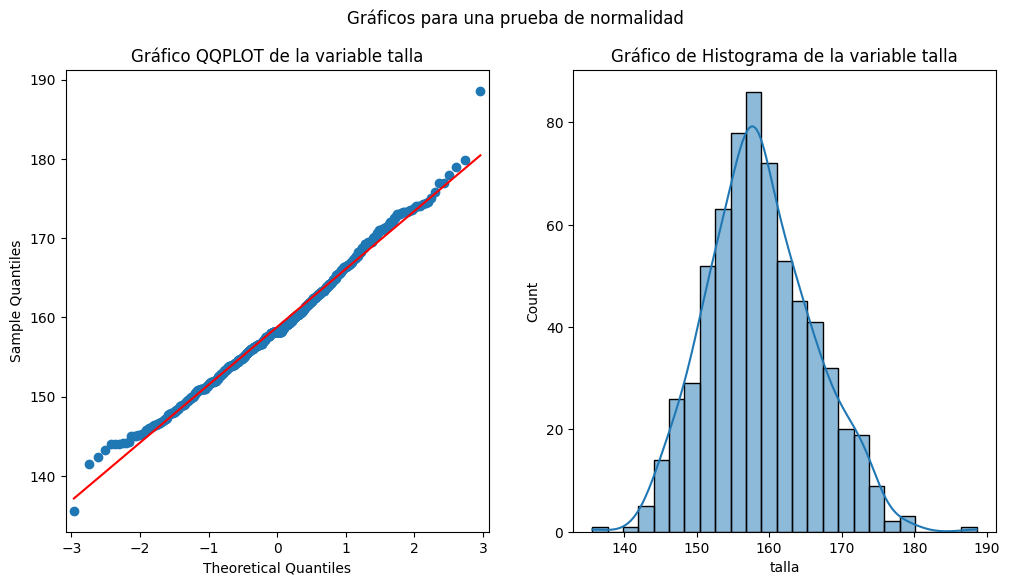

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable talla')
axes[1].set_title('Gráfico de Histograma de la variable talla')

qqplot(data_salud_f['talla'] , line='s', ax=axes[0])
sns.histplot(x='talla', data=data_salud_f, ax=axes[1], kde= True)
plt.show()

In [28]:
#Cuando n > 50

stat2, p2 = kstest(data_salud_f['talla'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=1.000, p-value=0.000


Los datos de la variable talla no estan normalmente distribuidos

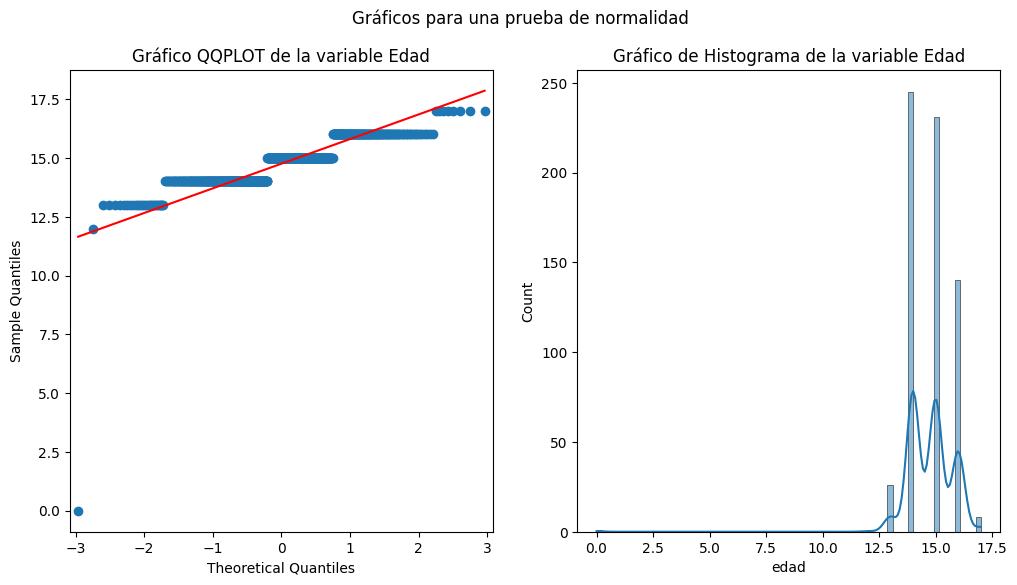

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable Edad')
axes[1].set_title('Gráfico de Histograma de la variable Edad')

qqplot(data_salud_f['edad'] , line='s', ax=axes[0])
sns.histplot(x='edad', data=data_salud_f, ax=axes[1], kde= True)
plt.show()

In [32]:
# Prueba de Shapiro-Wilk (n <= 50)
stat, p = shapiro(data_salud_f['edad'])

print('Estadisticos=%.3f, p-value=%.3f' % (stat, p))


Estadisticos=0.714, p-value=0.000


Los datos de la variable edad no estan normalmente distribuidos

In [33]:
#Cuando n > 50

stat2, p2 = kstest(data_salud_f['edad'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.998, p-value=0.000


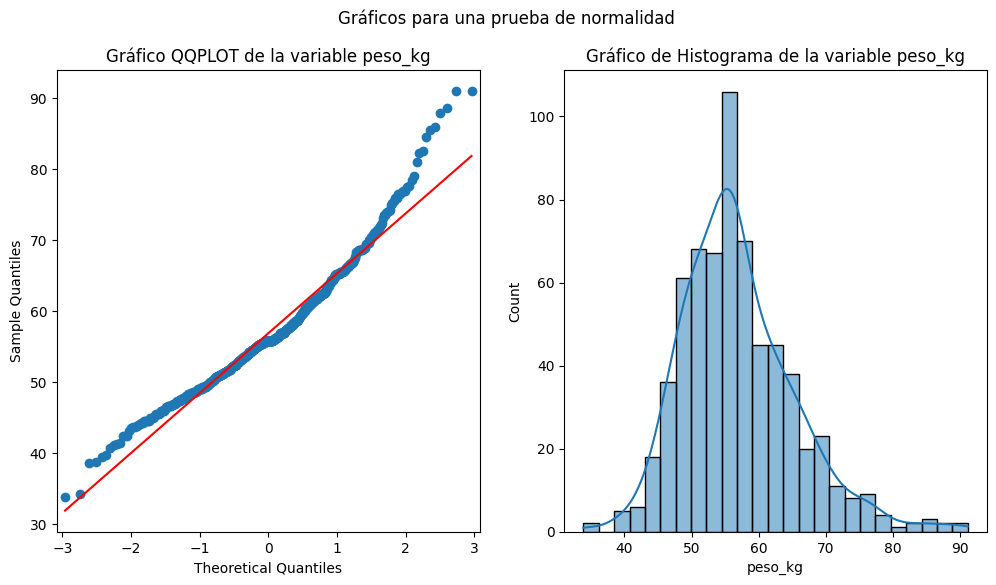

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable peso_kg')
axes[1].set_title('Gráfico de Histograma de la variable peso_kg')

qqplot(data_salud_f['peso_kg'] , line='s', ax=axes[0])
sns.histplot(x='peso_kg', data=data_salud_f, ax=axes[1], kde= True)
plt.show()

In [36]:
#Cuando n > 50

stat2, p2 = kstest(data_salud_f['peso_kg'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=1.000, p-value=0.000


Los datos de la variable peso_kg no estan normalmente distribuidos

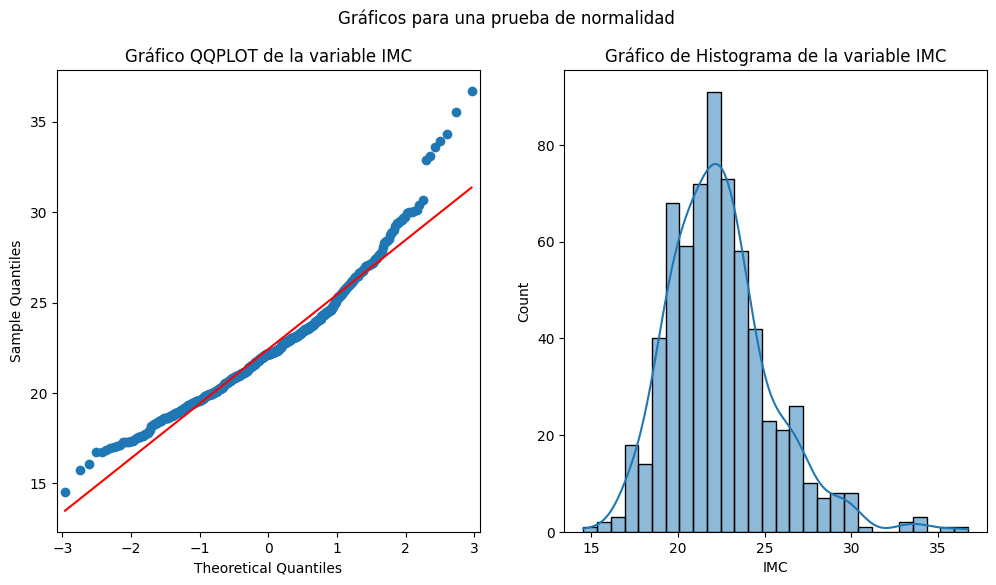

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable IMC')
axes[1].set_title('Gráfico de Histograma de la variable IMC')

qqplot(data_salud_f['IMC'] , line='s', ax=axes[0])
sns.histplot(x='IMC', data=data_salud_f, ax=axes[1], kde= True)
plt.show()

In [38]:
#Cuando n > 50

stat2, p2 = kstest(data_salud_f['IMC'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=1.000, p-value=0.000


Los datos de la variable IMC no estan normalmente distribuidos

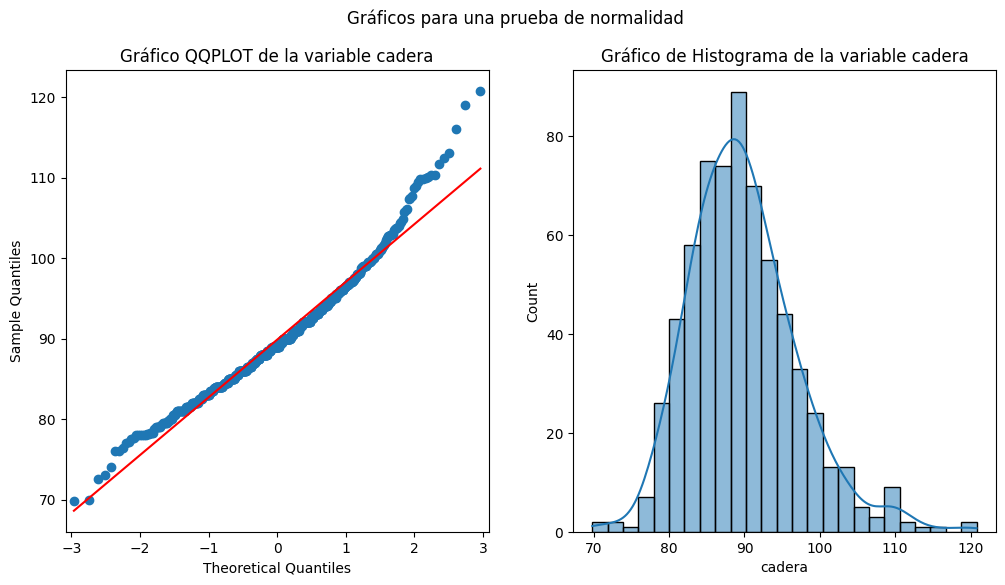

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable cadera')
axes[1].set_title('Gráfico de Histograma de la variable cadera')

qqplot(data_salud_f['cadera'] , line='s', ax=axes[0])
sns.histplot(x='cadera', data=data_salud_f, ax=axes[1], kde= True)
plt.show()

In [40]:
#Cuando n > 50

stat2, p2 = kstest(data_salud_f['cadera'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=1.000, p-value=0.000


Los datos de la variable cadera no estan normalmente distribuidos

## A. Normalizando variables / transformadas

normalización = ( x – min(x) ) / ( max(x) – min(x) )

Los valores normalizados para todos los demás valores del conjunto de datos estarán entre 0 y 1.

In [42]:
# Normalizamos las variables numéricas

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_salud_num2_norm = scaler.fit_transform(data_salud_num2)
data_salud_num2_norm

array([[0.37924528, 0.94117647, 0.6520979 , 0.67829486, 0.55294118],
       [0.58301887, 0.94117647, 0.47377622, 0.35302515, 0.60196078],
       [0.29622642, 0.94117647, 0.26573427, 0.31959639, 0.31764706],
       ...,
       [0.34716981, 0.88235294, 0.43706294, 0.37128037, 0.51372549],
       [0.73018868, 0.82352941, 0.95804196, 0.56317691, 0.61176471],
       [0.42264151, 0.82352941, 0.41433566, 0.38498255, 0.4745098 ]])

In [44]:
data_salud_num2_norm = pd.DataFrame(
    data=data_salud_num2_norm,
    columns=['talla', 'edad', 'peso_kg', 'IMC', 'cadera'])
data_salud_num2_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   talla    652 non-null    float64
 1   edad     652 non-null    float64
 2   peso_kg  652 non-null    float64
 3   IMC      652 non-null    float64
 4   cadera   652 non-null    float64
dtypes: float64(5)
memory usage: 25.6 KB


In [46]:
data_salud_num2_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   talla    652 non-null    float64
 1   edad     652 non-null    float64
 2   peso_kg  652 non-null    float64
 3   IMC      652 non-null    float64
 4   cadera   652 non-null    float64
dtypes: float64(5)
memory usage: 25.6 KB


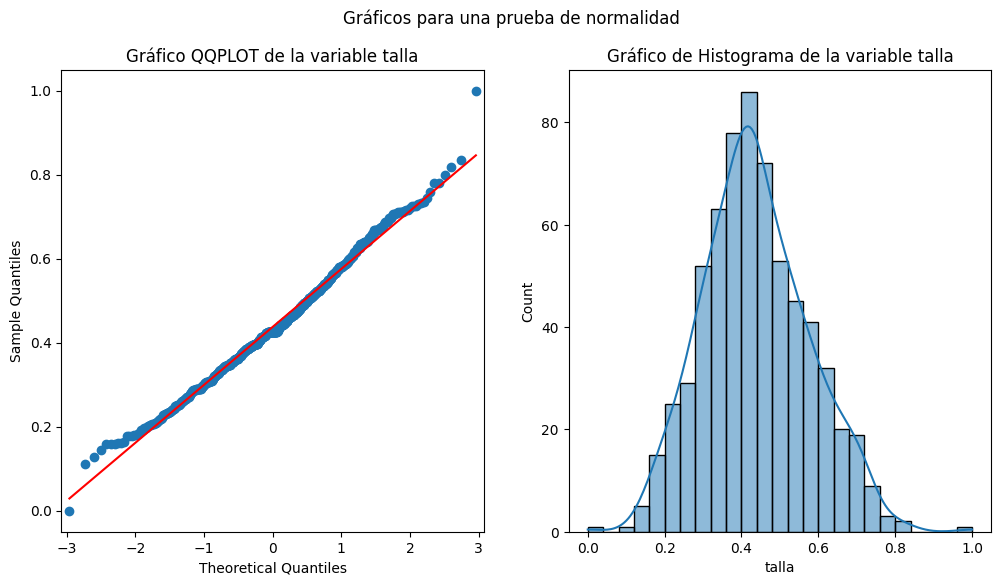

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable talla')
axes[1].set_title('Gráfico de Histograma de la variable talla')

qqplot(data_salud_num2_norm['talla'] , line='s', ax=axes[0])
sns.histplot(x='talla', data=data_salud_num2_norm, ax=axes[1], kde= True)
plt.show()

In [48]:
# Test de Kolmogorov-Smirnov
#Cuando n > 50

stat2, p2 = kstest(data_salud_num2_norm['talla'] , 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.557, p-value=0.000


Los datos de la variable talla no estan normalmente distribuidos

## B. Estandarización de variables

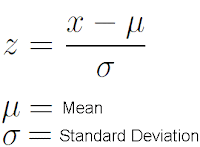



In [49]:
data_salud_num2_estand = zscore(data_salud_num2, axis=1)
data_salud_num2_estand

,talla,edad,peso_kg,IMC,cadera
0,1.625854,-1.157461,-0.057683,-0.886976,0.476267
1,1.676840,-1.030147,-0.220749,-0.915667,0.489723
2,1.735201,-0.979082,-0.315056,-0.866266,0.425203
3,1.711636,-1.022983,-0.245118,-0.879552,0.436018
4,1.673731,-1.027587,-0.241341,-0.910396,0.505593
...,...,...,...,...,...
647,1.652571,-1.104926,0.241970,-0.976982,0.187366
648,1.691078,-1.036819,-0.311894,-0.845488,0.503123
649,1.653539,-1.061147,-0.203775,-0.909409,0.520792
650,1.620794,-1.164057,0.133687,-0.937796,0.347372


In [50]:
data_salud_num2_estand = pd.DataFrame(
    data=data_salud_num2_estand,
    columns=['talla', 'edad', 'peso_kg', 'IMC', 'cadera'])
data_salud_num2_estand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   talla    652 non-null    float64
 1   edad     652 non-null    float64
 2   peso_kg  652 non-null    float64
 3   IMC      652 non-null    float64
 4   cadera   652 non-null    float64
dtypes: float64(5)
memory usage: 25.6 KB


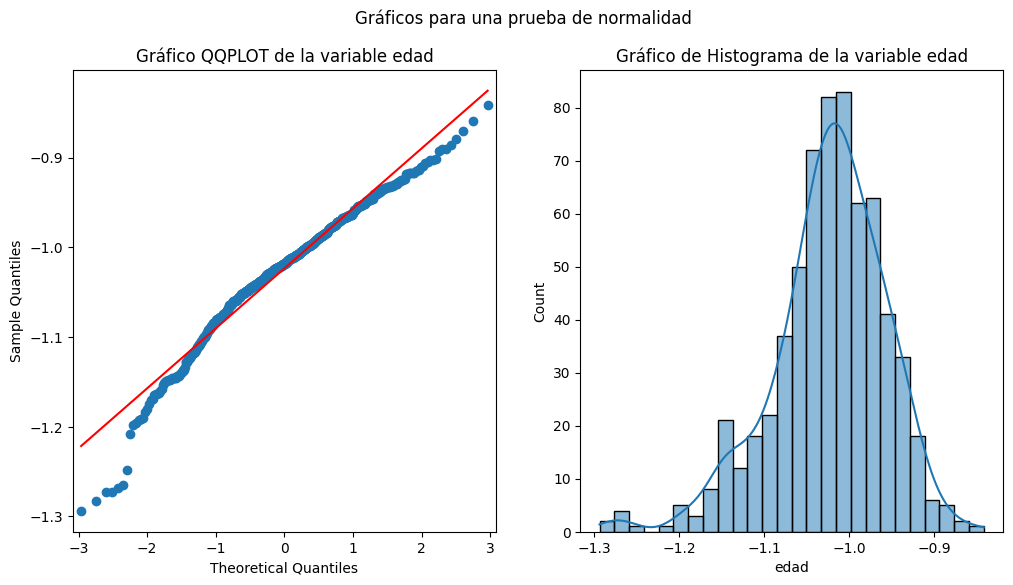

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable edad')
axes[1].set_title('Gráfico de Histograma de la variable edad')

qqplot(data_salud_num2_estand['edad'] , line='s', ax=axes[0])
sns.histplot(x='edad', data=data_salud_num2_estand, ax=axes[1], kde= True)
plt.show()

In [52]:
# Test de Kolmogorov-Smirnov
#Cuando n > 50

stat2, p2 = kstest(data_salud_num2_estand['edad'] , 'norm')  #zingreso
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.806, p-value=0.000


Los datos de la variable edad no estan normalmente distribuidos

## C. Normalización con SKLEARN

Estandariza los datos eliminando la media y escalando los datos de forma que su varianza sea igual a 1.

In [53]:
from sklearn.preprocessing import StandardScaler

skler = StandardScaler()
data_salud_num2_skler = skler.fit_transform(data_salud_num2)
data_salud_num2_skler


array([[-0.42331655,  1.18678536,  1.69474626,  2.37169139,  1.13378676],
       [ 1.05394871,  1.18678536,  0.48563394, -0.01893464,  1.4820788 ],
       [-1.02516536,  1.18678536, -0.92499711, -0.26462515, -0.53801505],
       ...,
       [-0.65584905,  0.23267432,  0.23669905,  0.11523525,  0.85515312],
       [ 2.12086251, -0.72143672,  3.76920369,  1.52561209,  1.55173721],
       [-0.10871377, -0.72143672,  0.08259649,  0.21594177,  0.57651949]])

In [54]:
import numpy as np

np.var(data_salud_num2_skler[:, 1]) # revisamos una de las columnas

1.0

In [55]:
data_salud_num2_skler = pd.DataFrame(
    data=data_salud_num2_skler,
    columns=['talla', 'edad', 'peso_kg', 'IMC', 'cadera'])
data_salud_num2_skler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   talla    652 non-null    float64
 1   edad     652 non-null    float64
 2   peso_kg  652 non-null    float64
 3   IMC      652 non-null    float64
 4   cadera   652 non-null    float64
dtypes: float64(5)
memory usage: 25.6 KB


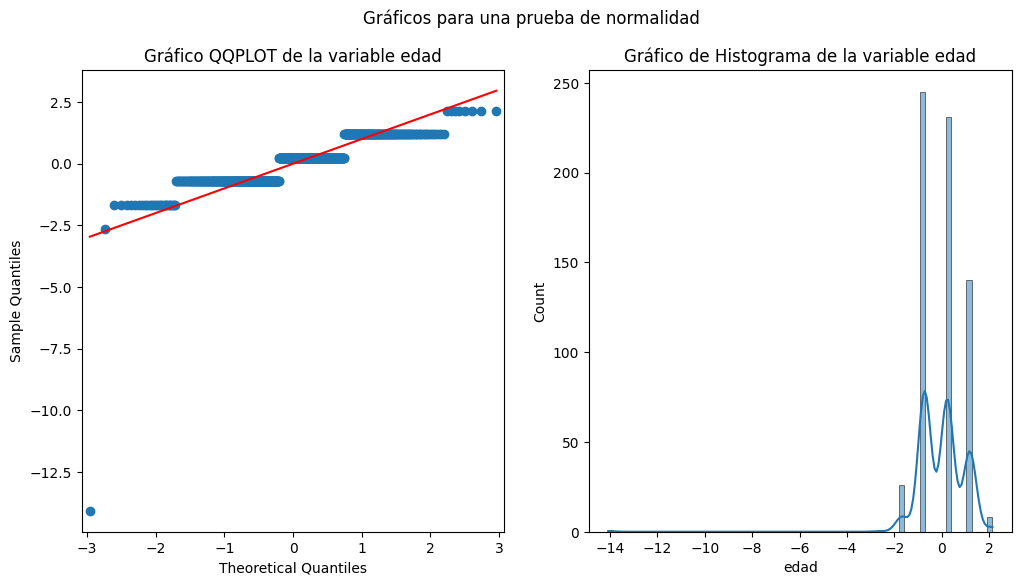

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable edad')
axes[1].set_title('Gráfico de Histograma de la variable edad')

qqplot(data_salud_num2_skler['edad'] , line='s', ax=axes[0])
sns.histplot(x='edad', data=data_salud_num2_skler, ax=axes[1], kde= True)
plt.show()

In [58]:
# Test de Kolmogorov-Smirnov
#Cuando n > 50

stat2, p2 = kstest(data_salud_num2_skler['edad'] , 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.192, p-value=0.000


Los datos de la variable edad no estan normalmente distribuidos

In [59]:
# Datos ficticios

import numpy  as np

np.random.seed(987654321)

mu, sigma = 0, 1  # Media y desviación estándar
mu1, sigma1 = 0.01, 1.01  # Media y desviación estándar

x = np.random.normal(mu, sigma, 4500)  # generando ua variable aleatoria
y = np.random.normal(mu1, sigma1, 4500)

dat = pd.DataFrame(
    data=np.transpose([x, y]),
    columns=["aleatorioX", "aleatorioY"])
dat.head(10)

,aleatorioX,aleatorioY
0,2.246551,-1.115130
1,-0.645918,0.169766
2,-1.183577,-0.639214
3,1.929493,-0.614270
4,0.066814,1.018083
5,-0.997060,-0.758451
6,0.815330,0.266785
7,-1.340937,-1.764732
8,1.910637,2.140246
9,0.709583,1.006906


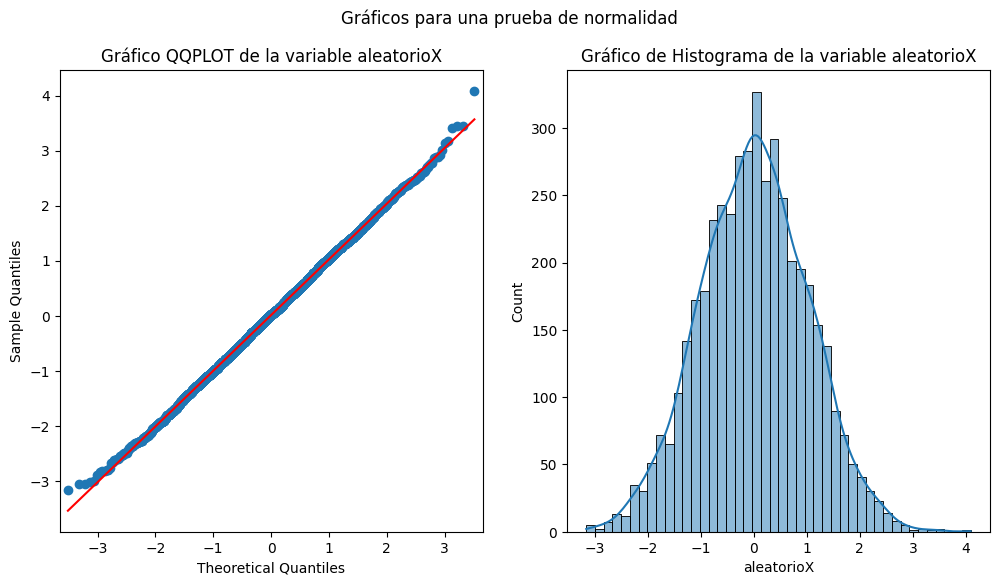

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable aleatorioX')
axes[1].set_title('Gráfico de Histograma de la variable aleatorioX')

qqplot(dat['aleatorioX'] , line='s', ax=axes[0])
sns.histplot(x='aleatorioX', data=dat, ax=axes[1], kde= True)
plt.show()

In [61]:
# aleatorioX
stat3, p3 = kstest(dat['aleatorioX'], 'norm', alternative='two-sided' ) # 2 colas
print('Estadisticos=%.3f, p-value=%.3f' % (stat3, p3))

Estadisticos=0.014, p-value=0.299


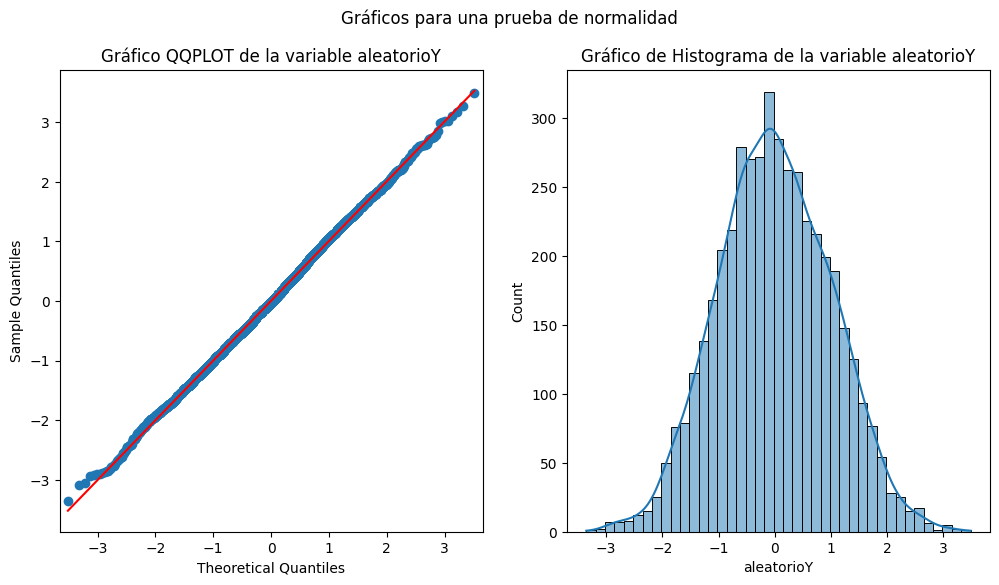

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable aleatorioY')
axes[1].set_title('Gráfico de Histograma de la variable aleatorioY')

qqplot(dat['aleatorioY'] , line='s', ax=axes[0])
sns.histplot(x='aleatorioY', data=dat, ax=axes[1], kde= True)
plt.show()

In [63]:
# aleatorioY
stat3, p3 = kstest(dat['aleatorioY'], 'norm', alternative='two-sided' ) # 2 colas
print('Estadisticos=%.3f, p-value=%.3f' % (stat3, p3))

Estadisticos=0.014, p-value=0.361


## Correlaciones


### Prueba de Correlacion: paramétrica  " r pearson"

Planteamiento de hipótesis:

Ho: No existe correlacion entre las variables A y B.

Ha: Existe correlacion entre las variables A y B.

Nivel de significancia = 5%

TypeError: ignored

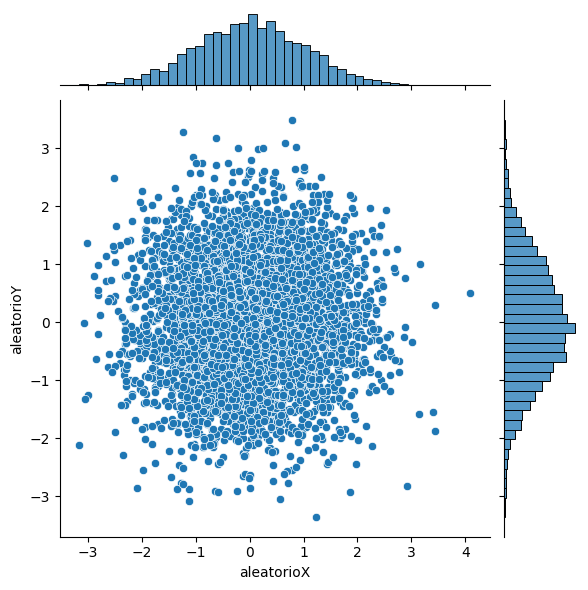

In [64]:
# Graficamos las variables a correlacionar
# con línea de tendencia
g=sns.jointplot(x=dat['aleatorioX'], y=dat['aleatorioY'])

sns.regplot(dat['aleatorioX'], dat['aleatorioY'], ax=g.ax_joint, scatter=False, color= 'red');


<Axes: title={'center': 'Histograma: variable aleatorioY'}, xlabel='aleatorioY', ylabel='Count'>

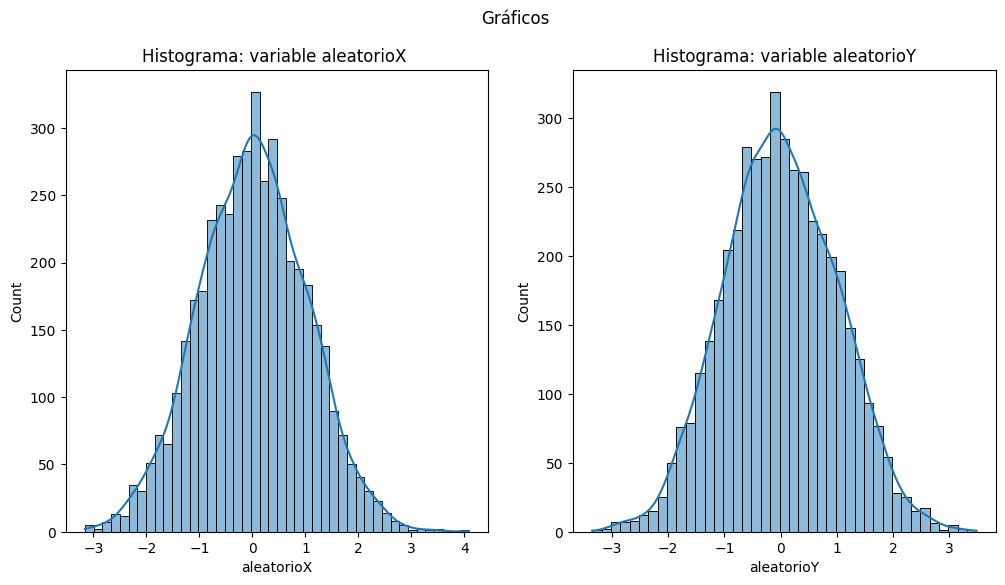

In [65]:
# Gráfico distribución de las variables

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos')

axes[0].set_title('Histograma: variable aleatorioX ')
axes[1].set_title('Histograma: variable aleatorioY')

sns.histplot(x='aleatorioX', data=dat, ax=axes[0], kde= True)
sns.histplot(x='aleatorioY', data=dat, ax=axes[1], kde= True)


In [66]:
# Correlación r de pearson
from scipy.stats import pearsonr, spearmanr

r, p = pearsonr(dat['aleatorioX'], dat['aleatorioY'])

print('Correlación Pearson=%.3f, p-value=%.3f' % (r, p))

Correlación Pearson=0.013, p-value=0.393


Conclusión: Con un nivel de significancia del 5% se afirma que, no existe correlación entre **aleatorioX** y **aleatorioY**.

### Prueba de Correlacion: No parametrica


Ho: Las variables A y B son mutuamente independientes.

Ha: Las variables A y B son mutuamente dependientes.

Nivel de significancia: 5%

In [67]:
data_salud_num2

,talla,edad,peso_kg,IMC,cadera
0,155.7,16.0,71.2,29.576170,98.0
1,166.5,16.0,61.0,22.364707,100.5
2,151.3,16.0,49.1,21.623567,86.0
3,151.7,16.0,54.6,23.117479,88.4
4,160.3,16.0,58.0,22.260196,97.9
...,...,...,...,...,...
647,165.5,14.0,88.0,21.029381,85.0
648,144.2,14.0,48.6,23.132073,87.5
649,154.0,15.0,58.9,22.769438,96.0
650,174.3,14.0,88.7,27.023922,101.0


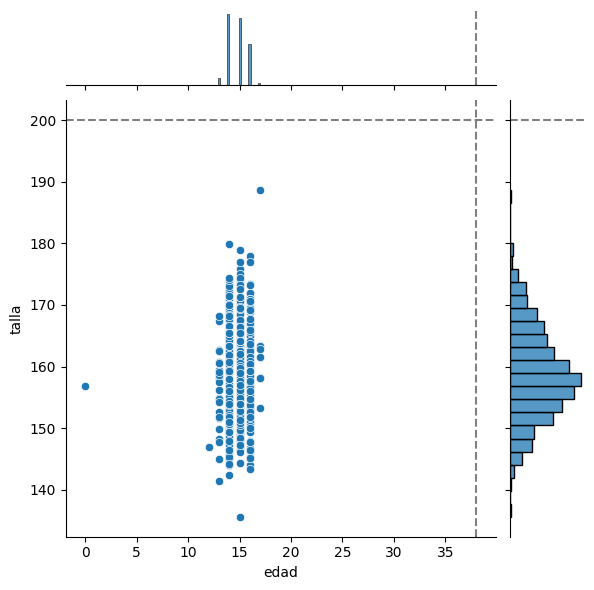

In [69]:
g = sns.JointGrid(x="edad", y="talla", data=data_salud_num2, palette = "ch:s=.50,rot=-.35")
g.plot(sns.scatterplot, sns.histplot)
g.refline(x=38, y=200)

In [70]:
# Correlación spearmanr
#from scipy.stats import pearsonr, spearmanr

rho, p = spearmanr(data_salud_num2['edad'], data_salud_num2['talla'])

print('Correlación Rho=%.3f, p-value=%.3f' % (rho, p))

Correlación Rho=0.087, p-value=0.026


Conclusión: Con un nivel de significancia del 5% se afirma que, la edad y el score son mutuamente dependientes, con una correlación de rho = 0.417.

## Chi - Cuadrado

2 variables son cualitativas (ordinales y/o nominales)

Ho: Las variables A y B son mutuamente independientes.

Ha: Las variables A y B son mutuamente dependientes.

Nivel de significancia: 5%


In [71]:
data_salud_cat2

,Individuo,Grupos
0,Persona 1,Grupo A
1,Persona 2,Grupo A
2,Persona 3,Grupo A
3,Persona 4,Grupo A
4,Persona 5,Grupo A
...,...,...
647,Persona 648,Grupo B
648,Persona 649,Grupo B
649,Persona 650,Grupo B
650,Persona 651,Grupo B


In [72]:
#                                          VI                        VD
contingencia= pd.crosstab(data_salud_cat2['Individuo'], data_salud_cat2['Grupos']) 
contingencia

Grupos,Grupo A,Grupo B
Individuo,,
Persona 1,1,0
Persona 10,1,0
Persona 100,1,0
Persona 101,1,0
Persona 102,1,0
...,...,...
Persona 95,1,0
Persona 96,1,0
Persona 97,1,0


<Axes: xlabel='Grupos', ylabel='Individuo'>

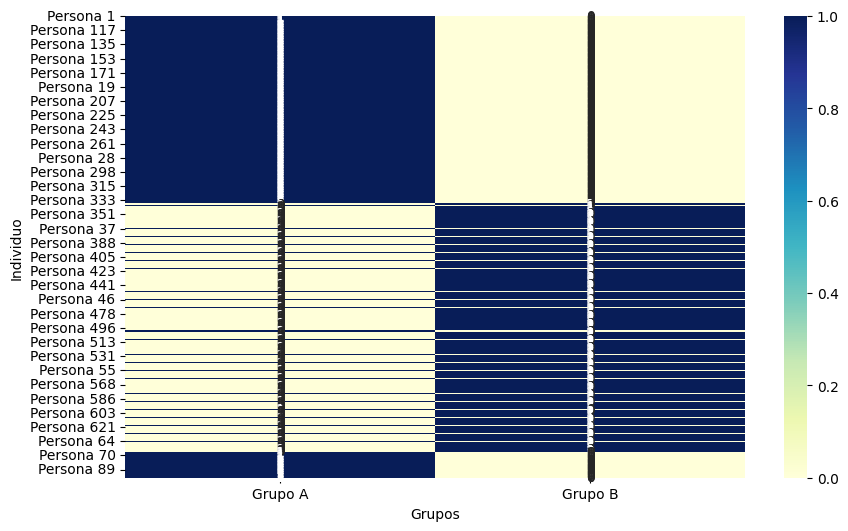

In [73]:
# Mapa de calor
plt.figure(figsize=(10,6)) 
sns.heatmap(contingencia, annot=True, cmap="YlGnBu")

In [74]:
# Chi-square test of independence. 
from scipy.stats import chi2_contingency

c, p, dof, expected = chi2_contingency(contingencia)
# Print the p-value
print('p-value = %.3f'% p)

p-value = 0.482


Las variables A y B son mutuamente dependientes.

## Prueba de  Dos muestras Independientes - PARAMÉTRICO

Ho: Mu1 = Mu2; No existen diferencias entre las medias.

Ha: Mu1 <> Mu2; Existen diferencias entre las medias.

Nivel de significancia: 5%

"Prueba de T de Student""
Utilizamos cuando los 2 grupos o muestras, la variable de investigaci?n tienen distribuciones normales.


In [75]:
data_salud_num2_skler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   talla    652 non-null    float64
 1   edad     652 non-null    float64
 2   peso_kg  652 non-null    float64
 3   IMC      652 non-null    float64
 4   cadera   652 non-null    float64
dtypes: float64(5)
memory usage: 25.6 KB


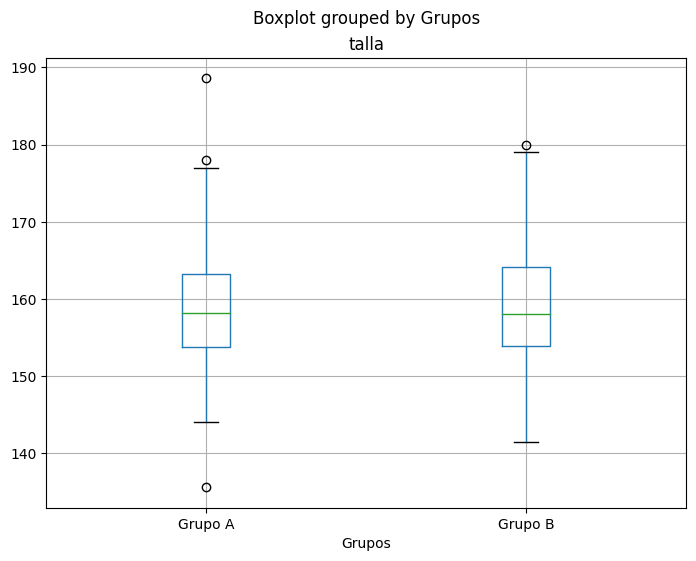

In [76]:
# Graficamos 

data_salud_f.boxplot(column="talla", by="Grupos",
	figsize=(8,6))
plt.show()

In [108]:
# Extrayendo la data para la prueba: riesgo y score

score_grupo_A = data_salud_f[data_salud_f['Grupos'] =='Grupo A']['edad']
score_grupo_B = data_salud_f[data_salud_f['Grupos'] =='Grupo B']['edad']
print("Grupo A = ", score_grupo_A )
print("Grupo B = ", score_grupo_B )

Grupo A =  0      16.0
1      16.0
2      16.0
3      16.0
4      16.0
       ... 
332    14.0
333    15.0
334    15.0
335    15.0
336    15.0
Name: edad, Length: 337, dtype: float64
Grupo B =  337    14.0
338    15.0
339    15.0
340    15.0
341    15.0
       ... 
647    14.0
648    14.0
649    15.0
650    14.0
651    14.0
Name: edad, Length: 315, dtype: float64


In [109]:
# Realizando la prueba t de 2 muestras independientes
from scipy.stats import ttest_ind

stadis, p = ttest_ind(score_grupo_A, score_grupo_B)

print('Prueba T=%.3f, p-value=%.3f' % (stadis, p))

Prueba T=19.608, p-value=0.000


Conclusion: Con un nivel de significancia del 5% se afirma que, existen diferencias entre las medias del score por tipo de riesgo.


## Prueba de Dos muestras Dependientes o Pareadas - PARAMÉTRICA

Ho: Mu1 = Mu2; No existen diferencias entre las medias.

Ha: Mu1 <> Mu2; Existen diferencias entre las medias.

"Prueba de T de Student" Utilizamos cuando los 2 grupos o muestras, la variable de investigación tienen distribuciones normales.

In [85]:
# Para este caso, vamos a generar datos aleatorios de tipo riesgo.

#Observaremos en un 1er momento y 2do momento

import numpy  as np

np.random.seed(987654321)

mu1, sigma1 = 180, 60  # Media y desviación estándar
mu2, sigma2 = 250, 65  # Media y desviación estándar

P1er_momento = np.random.normal(mu1, sigma1, 4500)  # generando una variable aleatoria
P2do_momento = np.random.normal(mu2, sigma2, 4500)

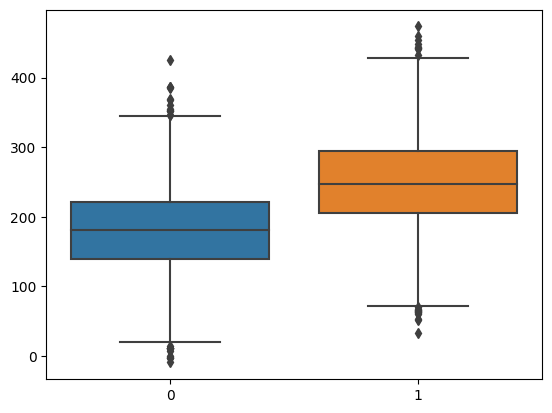

In [86]:
# Graficamos 
import seaborn as sns

x= [P1er_momento, P2do_momento]
ax=sns.boxplot(data=x)

In [90]:
# Realizando la prueba t de 2 muestras dependientes o pareadas
from scipy.stats import ttest_rel

stadis, p = ttest_rel(P1er_momento, P2do_momento)

print('Estadístico=%.3f, p-value=%.3f' % (stadis, p))

Estadístico=-52.459, p-value=0.000


Existen diferencias entre el score observado en el 1er momento y el 2do momento.

## Prueba de ANOVA: "n" muestras independientes - PARAMÉTRICA

Ho: Mu1 = Mu2  = Mun; No existen diferencias entre las medias de los "n" grupos.

Ha: Mu1 <> Mun; Existen diferencias entre al menos dos medias.

"Prueba de ANOVA" Utilizamos cuando los "n" grupos o muestras, en la variable de investigación tienen distribuciones normales.

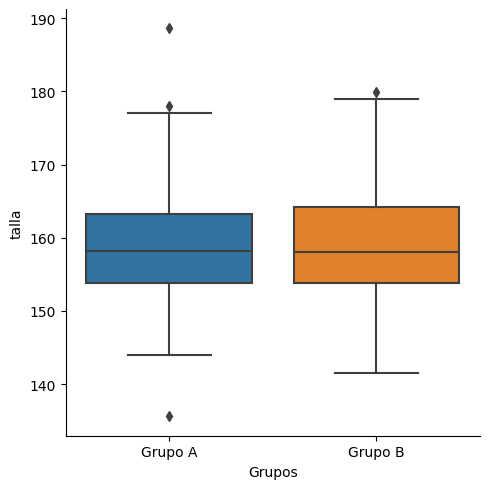

In [91]:
# Graficamos 
import seaborn as sns

sns.catplot(x = "Grupos", y = "talla", data = data_salud_f, kind = "box");

In [95]:
# Tabla de frecuencia de la variable de agrupamiento
zona_count = (data_salud_f
                       .groupby("Grupos")
                       .agg(frequency=("Grupos", "count")))

zona_count["Acumulado"] = zona_count["frequency"].cumsum()
zona_count

,frequency,Acumulado
Grupos,,
Grupo A,337,337
Grupo B,315,652


Continuamos bajo el supuesto de normalidad de los datos

In [99]:
# Realizando la prueba ANOVA para "n" muestras independientes

import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('talla ~ Grupos', data =data_salud_f).fit()
anova = sm.stats.anova_lm(mod, typ=2)

print(anova)

                sum_sq     df         F    PR(>F)
Grupos       11.063993    1.0  0.206436  0.649727
Residual  34836.958277  650.0       NaN       NaN


Conclusion: Con un nivel de significancia del 5% se afirma que, al menos un par de medias son significativamente distintas la una de la otra.

## Test de Levene
Prueba de igualdad de varianzas

Ho: No existen diferencias entre las varianzas / homoscedasticidad (igualdad de varianzas)

Ha: Existen diferencias entre las varianzas / no son iguales (homogénea)

In [106]:
# Extrayendo la data para la prueba: riesgo y score

grupo_A = data_salud_f[data_salud_f['Grupos'] =='Grupo A']['talla']
grupo_B = data_salud_f[data_salud_f['Grupos'] =='Grupo B']['talla']
print("Grupo A = ", grupo_A )
print("Grupo B = ", grupo_B )

Grupo A =  0      155.7
1      166.5
2      151.3
3      151.7
4      160.3
       ...  
332    149.2
333    157.5
334    174.5
335    167.5
336    166.4
Name: talla, Length: 337, dtype: float64
Grupo B =  337    153.0
338    160.0
339    151.6
340    150.9
341    162.7
       ...  
647    165.5
648    144.2
649    154.0
650    174.3
651    158.0
Name: talla, Length: 315, dtype: float64


In [107]:
from scipy.stats import levene

stat, p = levene(grupo_A, grupo_B)

print('Prueba Igualdad de Varianzas=%.3f, p-value=%.3f' % (stat, p))


Prueba Igualdad de Varianzas=4.486, p-value=0.035


Siendo que Pvalue <= 0.05, el test Levene encuentra diferencias significativas entre las varianzas de los dos grupos.

## Prueba de Dos Proporciones - PARAMÉTRICA

Ho: Pa = Pb ; la proporción (a) no es diferente de la proporción (b)

Ha: Pa <> Pb; la proporción (a) es diferente de la proporción (b)

Nivel de significancia: 5% = 0.05


In [103]:
from scipy.stats import norm
import numpy as np

# observaciones "Tamaño de las muestras"
n1 = 200  # clientes
n2 = 300  # Usuarios

# aciertos / la misma variable "Clientes/Usuarios totalmente satisfechos"
x1 = 50   # clientes
x2 = 150  # Usuarios

p1 = x1/n1  # clientes
p2 = x2/n2  # usuarios

p= (x1 + x2)/(n1 + n2) # proporción muestral

z_stat = (p1 - p2) / np.sqrt(p*(1-p)*((1/n1) + (1/n2)))
p = norm.cdf(z_stat)

print('Diferencia de proporciones=%.3f, p-value=%.3f' % (z_stat, p))

Diferencia de proporciones=-5.590, p-value=0.000


Decision: la proporción (a) es diferente de la proporción (b)

## PRUEBA WILCOXON 2 MUESTRAS RELACIONADAS O PAREADAS
(no paramétrica)

Ho: Med(Diferencia) = 0; La mediana de las diferencias de cada par de datos es cero.

Ha: Med(Diferencia) <> 0; La mediana de las diferencias de cada par de datos es diferente de cero.

Nivel de significancia: 5% = 0.05

In [104]:
# Trabajamos la data
P1er_momento = np.random.random(4500)*250 
P2do_momento = np.random.random(4500)*265

# Variable: velocidad
print(P1er_momento)
print(P2do_momento)


[240.46650679  86.53910451  91.87129498 ... 110.69654602 126.86777721
  56.72136688]
[ 53.96975623 144.11216995  52.24050651 ... 221.96443088  47.08878092
 131.42827265]


In [105]:
from scipy.stats import wilcoxon

wi_test, p = wilcoxon(P1er_momento, P2do_momento)

print('Prueba de Wilcoxon=%.3f, p-value=%.3f' % (wi_test, p))

Prueba de Wilcoxon=4720861.000, p-value=0.000


La mediana de las diferencias de la Velocidad en el 1er y 2do momento es diferente de cero.

## Prueba U de Mann Whitney: muestras independientes

(no paramétrica)

Diferencia de medianas

Ho: U1 = U2; de la variable de estudio.

Ha: U1 <> U2; de la variable de estudio

Nivel de significancia: 5%


In [110]:
data_salud_f

,Individuo,Grupos,talla,edad,peso_kg,IMC,cadera
0,Persona 1,Grupo A,155.7,16.0,71.2,29.576170,98.0
1,Persona 2,Grupo A,166.5,16.0,61.0,22.364707,100.5
2,Persona 3,Grupo A,151.3,16.0,49.1,21.623567,86.0
3,Persona 4,Grupo A,151.7,16.0,54.6,23.117479,88.4
4,Persona 5,Grupo A,160.3,16.0,58.0,22.260196,97.9
...,...,...,...,...,...,...,...
647,Persona 648,Grupo B,165.5,14.0,88.0,21.029381,85.0
648,Persona 649,Grupo B,144.2,14.0,48.6,23.132073,87.5
649,Persona 650,Grupo B,154.0,15.0,58.9,22.769438,96.0
650,Persona 651,Grupo B,174.3,14.0,88.7,27.023922,101.0


In [111]:
# Extrayendo la data para la prueba: riesgo y edad

peso_grupo_A = data_salud_f[data_salud_f['Grupos'] =='Grupo A']['peso_kg']
peso_grupo_B = data_salud_f[data_salud_f['Grupos'] =='Grupo B']['peso_kg']
print("Grupo A = ", grupo_A )
print("Grupo B = ", grupo_B )

Grupo A =  0      155.7
1      166.5
2      151.3
3      151.7
4      160.3
       ...  
332    149.2
333    157.5
334    174.5
335    167.5
336    166.4
Name: talla, Length: 337, dtype: float64
Grupo B =  337    153.0
338    160.0
339    151.6
340    150.9
341    162.7
       ...  
647    165.5
648    144.2
649    154.0
650    174.3
651    158.0
Name: talla, Length: 315, dtype: float64


In [112]:
print("Grupo A --> n1: ", len(peso_grupo_A))
print("Grupo B --> n2: ", len(peso_grupo_B))

Con riesgo --> n1:  337
Sin riesgo --> n2:  315


In [113]:
from scipy.stats import kruskal

KW_test, p =kruskal(peso_grupo_A, peso_grupo_B)

print('Prueba de U de Mann Whitney=%.3f, p-value=%.3f' % (KW_test, p))

Prueba de U de Mann Whitney=2.953, p-value=0.086


Conclusión: con un nivel de significancia mayor al 5%, afirmamos que el peso de los grupos_A y grupo_B es estadísticamente diferente.